In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

import calendar
from datetime import datetime, timedelta


import plotly
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

# 경고메세지 팝업 끄기
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('stock.adj_close.csv')

In [3]:
df.head(3)

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


# 데이터 전처리

## 주식명 확인 및 Sector 가져오기

In [5]:
import FinanceDataReader as fdr

In [6]:
df_krx = fdr.StockListing('KRX')

In [7]:
df_krx.head(5)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [8]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 0 to 7210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7211 non-null   object        
 1   Market          7211 non-null   object        
 2   Name            7211 non-null   object        
 3   Sector          2437 non-null   object        
 4   Industry        2418 non-null   object        
 5   ListingDate     2437 non-null   datetime64[ns]
 6   SettleMonth     2437 non-null   object        
 7   Representative  2437 non-null   object        
 8   HomePage        2257 non-null   object        
 9   Region          2437 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 619.7+ KB


In [9]:
df_krx = df_krx[["Symbol","Name","Sector","Industry"]]

In [10]:
df["Symbol"]=df["Symbol"].str.replace("A","")

In [11]:
df2 = pd.merge(df_krx, df, how='left', left_on='Symbol', right_on='Symbol')

In [12]:
df2 = df2.dropna()

In [ ]:
pd.set_option('display.max_columns', 100)                       # 출력할 열의 최대개수
pd.set_option('display.max_colwidth', 200)                      # 출력할 열의 너비


In [13]:
df2.groupby('Sector').count().sort_values('Symbol', ascending=False)[:30]

,Symbol,Name,Industry,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Sector,,,,,,,,,,,,,,,,,,,,,
특수 목적용 기계 제조업,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
소프트웨어 개발 및 공급업,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
전자부품 제조업,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
자동차 신품 부품 제조업,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
의약품 제조업,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
기타 금융업,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
기타 화학제품 제조업,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
통신 및 방송 장비 제조업,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
1차 철강 제조업,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55


In [14]:
sectors = dict(list(df2.groupby('Sector')))

print('count', len(sectors))
list(sectors.keys())[:10]

count 150


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

## 특정 Sector 선정

**선택 Sector : '기타 식품 제조업','항공 여객 운송업'  
선택 이유 : 특정 섹터를 통해 팬더믹 영향과 수익률을 구하고자 함**

### 기타 식품제조업

In [155]:
food_sec = sectors['기타 식품 제조업']

print('row count:', len(food_sec))
food_sec

row count: 23


,Symbol,Name,Sector,Industry,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
57,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",3050.0,3200.0,3180.0,3180.0,3155.0,3280.0,...,5520.0,5150.0,5160.0,5110.0,5090.0,5080.0,5030.0,5020.0,4870.0,4895.0
60,097950,CJ제일제당,기타 식품 제조업,"설탕,소맥분,조미식품,육가공식품(돈육,돼지비계,돼지식용설육),대두가공식품,사료,의약...",355500.0,357500.0,364000.0,379000.0,372500.0,380500.0,...,389500.0,389500.0,375500.0,401500.0,403500.0,392000.0,394000.0,393000.0,387000.0,387000.0
1997,005610,SPC삼립,기타 식품 제조업,"빵,아이스크림,과자,케익,유산균음료,인스턴트식품,병조림,면류,식용유 제조,판매",114000.0,126500.0,125000.0,139000.0,139000.0,135000.0,...,60500.0,60900.0,60500.0,60700.0,61700.0,64400.0,63100.0,62900.0,62300.0,62300.0
2357,004370,농심,기타 식품 제조업,"라면,스낵,유지 제조,도매,수출입",334500.0,348500.0,346500.0,356000.0,350500.0,353500.0,...,343000.0,351000.0,343000.0,349000.0,345000.0,343500.0,345500.0,342500.0,337000.0,333500.0
2403,001680,대상,기타 식품 제조업,"전분,라이신,물엿,과당,포도당,MSG및 사료,조미료,항생제,핵산,커피 제조,도매/토...",27150.0,27250.0,27400.0,28950.0,28750.0,28950.0,...,26800.0,27100.0,26600.0,27150.0,27500.0,27550.0,27100.0,27000.0,26750.0,26900.0
2550,049770,동원F&B,기타 식품 제조업,"참치캔,음료,냉동식품 제조,판매",227000.0,247500.0,263000.0,285500.0,282000.0,285500.0,...,176000.0,176500.0,173500.0,173000.0,177500.0,180000.0,177000.0,177500.0,175500.0,178500.0
2661,280360,롯데제과,기타 식품 제조업,"껌,캔디,초코,비스켓,빙과",182000.0,183000.0,182500.0,184000.0,184500.0,184000.0,...,104000.0,105500.0,103500.0,102500.0,103500.0,104000.0,105000.0,103500.0,103000.0,101500.0
3595,145990,삼양사,기타 식품 제조업,설탕,86100.0,88400.0,89100.0,90800.0,90600.0,90800.0,...,65400.0,64600.0,63700.0,63500.0,63500.0,64800.0,63700.0,63100.0,61600.0,60800.0
3597,003230,삼양식품,기타 식품 제조업,"라면,스낵,유제품,장유,식용유,사료,향신료,건강음료(루이보스 티) 제조,도매",112000.0,113500.0,109500.0,111500.0,110000.0,106500.0,...,106500.0,108000.0,105500.0,105500.0,108500.0,111500.0,110000.0,110000.0,108000.0,108500.0
3648,248170,샘표식품,기타 식품 제조업,간장,36400.0,36900.0,36850.0,38800.0,37950.0,38100.0,...,47000.0,46850.0,47150.0,47150.0,47200.0,47200.0,47650.0,47000.0,46600.0,46900.0


In [16]:
# 필요한 열만 남기고 삭제
fd_sec = food_sec.drop(['Symbol','Sector','Industry'],axis=1)

In [ ]:
fd_sec.head(1)

In [17]:
# 일자별 기준으로 인덱스 설정을 위해 표 전환
fd_sec = fd_sec.T

In [ ]:
fd_sec.head(2)

In [18]:
# 주식명을 컬럼명으로 만들기
fd_sec = fd_sec.rename(columns=fd_sec.iloc[0])

In [20]:
fd_sec = fd_sec.drop(fd_sec.index[0])

In [21]:
fd_sec.head(3)

,CJ씨푸드,CJ제일제당,SPC삼립,농심,대상,동원F&B,롯데제과,삼양사,삼양식품,샘표식품,...,엠에스씨,오뚜기,오리온,조흥,코스맥스엔비티,크라운제과,풀무원,한국맥널티,해태제과식품,행남사
2018-06-01,3050.0,355500.0,114000.0,334500.0,27150.0,227000.0,182000.0,86100.0,112000.0,36400.0,...,7700.0,857000.0,134500.0,206500.0,23750.0,14150.0,13250.0,6280.0,14850.0,3340.0
2018-06-04,3200.0,357500.0,126500.0,348500.0,27250.0,247500.0,183000.0,88400.0,113500.0,36900.0,...,7590.0,855000.0,144500.0,212000.0,23500.0,14200.0,13450.0,6405.0,14950.0,3290.0
2018-06-05,3180.0,364000.0,125000.0,346500.0,27400.0,263000.0,182500.0,89100.0,109500.0,36850.0,...,7240.0,846000.0,141500.0,212000.0,23850.0,14250.0,13100.0,6280.0,14900.0,3390.0


In [132]:
# 값을 상수로 바꾸기
fd_sec = fd_sec.apply(pd.to_numeric, errors='coerce')

In [133]:
fd_sec

,CJ씨푸드,CJ제일제당,SPC삼립,농심,대상,동원F&B,롯데제과,삼양사,삼양식품,샘표식품,...,엠에스씨,오뚜기,오리온,조흥,코스맥스엔비티,크라운제과,풀무원,한국맥널티,해태제과식품,행남사
2018-06-01,3050.0,355500.0,114000.0,334500.0,27150.0,227000.0,182000.0,86100.0,112000.0,36400.0,...,7700.0,857000.0,134500.0,206500.0,23750.0,14150.0,13250.0,6280.0,14850.0,3340.0
2018-06-04,3200.0,357500.0,126500.0,348500.0,27250.0,247500.0,183000.0,88400.0,113500.0,36900.0,...,7590.0,855000.0,144500.0,212000.0,23500.0,14200.0,13450.0,6405.0,14950.0,3290.0
2018-06-05,3180.0,364000.0,125000.0,346500.0,27400.0,263000.0,182500.0,89100.0,109500.0,36850.0,...,7240.0,846000.0,141500.0,212000.0,23850.0,14250.0,13100.0,6280.0,14900.0,3390.0
2018-06-07,3180.0,379000.0,139000.0,356000.0,28950.0,285500.0,184000.0,90800.0,111500.0,38800.0,...,7290.0,890000.0,146000.0,218500.0,24000.0,14850.0,14000.0,6280.0,15050.0,3185.0
2018-06-08,3155.0,372500.0,139000.0,350500.0,28750.0,282000.0,184500.0,90600.0,110000.0,37950.0,...,7340.0,888000.0,148500.0,219500.0,23700.0,14700.0,14200.0,6280.0,15000.0,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,5080.0,392000.0,64400.0,343500.0,27550.0,180000.0,104000.0,64800.0,111500.0,47200.0,...,4290.0,590000.0,138000.0,150500.0,10750.0,8680.0,17600.0,7290.0,9400.0,1770.0
2020-09-15,5030.0,394000.0,63100.0,345500.0,27100.0,177000.0,105000.0,63700.0,110000.0,47650.0,...,4345.0,586000.0,139000.0,150000.0,10550.0,8880.0,17600.0,7590.0,9310.0,1770.0
2020-09-16,5020.0,393000.0,62900.0,342500.0,27000.0,177500.0,103500.0,63100.0,110000.0,47000.0,...,4330.0,585000.0,140000.0,150000.0,10400.0,8830.0,17500.0,7400.0,9180.0,1770.0
2020-09-17,4870.0,387000.0,62300.0,337000.0,26750.0,175500.0,103000.0,61600.0,108000.0,46600.0,...,4330.0,578000.0,147000.0,150000.0,9900.0,8800.0,17400.0,7430.0,9050.0,1770.0


In [134]:
# 인덱스를 날짜형식으로 바꾸기
fd_sec.index

DatetimeIndex(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-14',
               '2018-06-15', '2018-06-18',
               ...
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', length=568, freq=None)

In [137]:
fd_sec.index = pd.to_datetime(fd_sec.index)

In [ ]:
import matplotlib.pyplot as plt

#plt.rc('font', family='NanumGothicOTF') # For Mac`OS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

In [ ]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

In [42]:
# matplotlib rebuild
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

### 항공여객운송업

In [24]:
air_sec = sectors['항공 여객 운송업']

print('row count:', len(air_sec))
air_sec.head(10)

row count: 5


,Symbol,Name,Sector,Industry,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
2480,003490,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",26760.0,26969.0,26802.0,26676.0,26551.0,27220.0,...,18700.0,18750.0,18400.0,18550.0,18300.0,18650.0,19150.0,19200.0,18900.0,18800.0
3973,020560,아시아나항공,항공 여객 운송업,"항공운송(여객운송,화물운송)/항공기 제조,정비수리",4910.0,4965.0,4915.0,4875.0,4865.0,4895.0,...,3995.0,3920.0,3985.0,4130.0,4065.0,3965.0,3995.0,3955.0,3905.0,3945.0
4631,089590,제주항공,항공 여객 운송업,"여객운송서비스, 화물운송서비스",45592.0,45683.0,46322.0,46139.0,46048.0,45136.0,...,12750.0,12850.0,12750.0,12900.0,12800.0,13150.0,13850.0,13800.0,13800.0,14000.0
4690,272450,진에어,항공 여객 운송업,"여객, 화물 등 항공운송",27840.0,28064.0,27795.0,26535.0,26490.0,27075.0,...,8185.0,8446.0,8428.0,8869.0,8869.0,9040.0,9730.0,9570.0,9530.0,9500.0
7072,180640,한진칼,항공 여객 운송업,"지주사업, 경영자문 및 컨설팅",23550.0,22750.0,22400.0,21100.0,21000.0,21600.0,...,74000.0,74500.0,73300.0,73400.0,72800.0,74600.0,77400.0,77600.0,77000.0,80100.0


In [25]:
# 필요한 열만 남기고 삭제
air_sec = air_sec.drop(['Symbol','Sector','Industry'],axis=1)

In [26]:
# 일자별 기준으로 인덱스 설정을 위해 표 전환
air_sec = air_sec.T

In [27]:
air_sec

,2480,3973,4631,4690,7072
Name,대한항공,아시아나항공,제주항공,진에어,한진칼
2018-06-01,26760.0,4910.0,45592.0,27840.0,23550.0
2018-06-04,26969.0,4965.0,45683.0,28064.0,22750.0
2018-06-05,26802.0,4915.0,46322.0,27795.0,22400.0
2018-06-07,26676.0,4875.0,46139.0,26535.0,21100.0
...,...,...,...,...,...
2020-09-14,18650.0,3965.0,13150.0,9040.0,74600.0
2020-09-15,19150.0,3995.0,13850.0,9730.0,77400.0
2020-09-16,19200.0,3955.0,13800.0,9570.0,77600.0
2020-09-17,18900.0,3905.0,13800.0,9530.0,77000.0


In [28]:
# 주식명을 컬럼명으로 만들기
air_sec = air_sec.rename(columns=air_sec.iloc[0])

In [29]:
air_sec.head(2)

,대한항공,아시아나항공,제주항공,진에어,한진칼
Name,대한항공,아시아나항공,제주항공,진에어,한진칼
2018-06-01,26760.0,4910.0,45592.0,27840.0,23550.0


In [140]:
# 값을 상수로 바꾸기
air_sec = air_sec.apply(pd.to_numeric, errors='coerce')

In [30]:
air_sec = air_sec.drop(air_sec.index[0])

In [144]:
# 인덱스를 날짜형식으로 바꾸기
air_sec.index

DatetimeIndex(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-14',
               '2018-06-15', '2018-06-18',
               ...
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', length=568, freq=None)

In [145]:
air_sec.index = pd.to_datetime(air_sec.index)

In [34]:
air_sec.tail(2)

,대한항공,아시아나항공,제주항공,진에어,한진칼
2020-09-17,18900.0,3905.0,13800.0,9530.0,77000.0
2020-09-18,18800.0,3945.0,14000.0,9500.0,80100.0


### 가설1 ] 팬더믹 기간동안  주식시장에도 영향을 주었는가?

In [35]:
# 주요 주식 지표 데이터에서 확인
kospi = fdr.DataReader('KS11', '2018-01-01','2020-09-18') 
sp500 = fdr.DataReader('US500', '2018-01-01','2020-09-18') #sp500 index

In [37]:
df_w = pd.concat([kospi['Close'],sp500['Close']], axis=1)
df_w.columns = ['KOSPI','S&P500']

In [38]:
df_w.corr()

,KOSPI,S&P500
KOSPI,1.00000,0.09067
S&P500,0.09067,1.00000


Text(2019-12, 70, 'Pandemic')

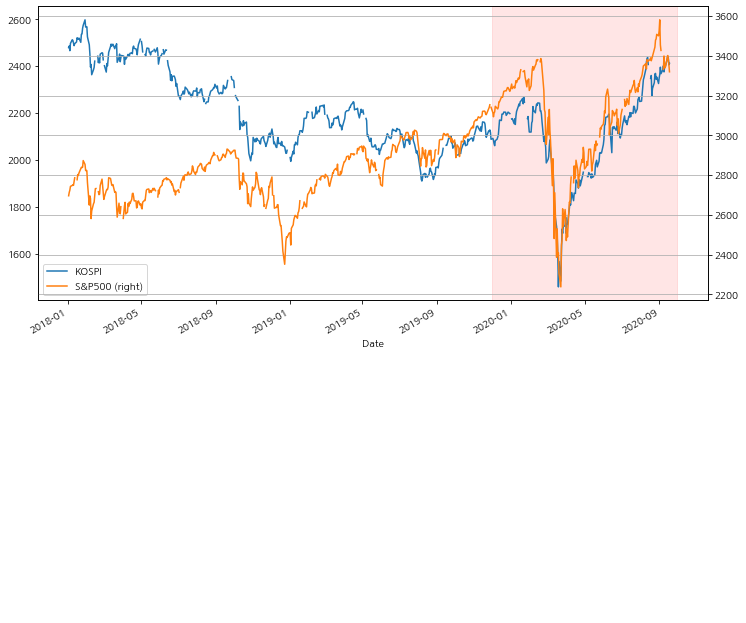

In [46]:
ax_w=df_w[['KOSPI','S&P500']].plot(secondary_y='S&P500')

#팬더믹
ax_w.axvspan('2019-12','2020-10', alpha = 0.1, color = 'red')
ax_w.annotate('Pandemic', xy = ('2019-12', 70), fontsize = 20)

**Pandemic 발생 후 2020년 3월 이후 급격한 하락을 보였지만, 다시 회복 후 상승세를 보임**

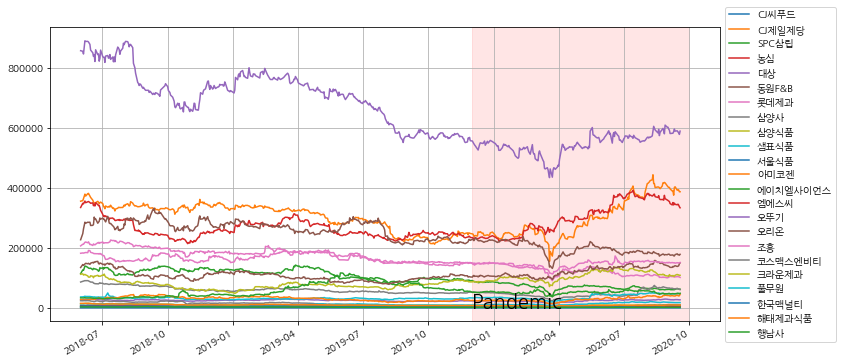

In [53]:
ax = fd_sec.plot()

#팬더믹
ax.axvspan('2019-12','2020-10', alpha = 0.1, color = 'red')
ax.annotate('Pandemic', xy = ('2019-12', 70), fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**'기타 식품 제조업'에서도 2020년 3월 이후 급격히 하락하였으나, 다시 회복하는 패턴을 보임**

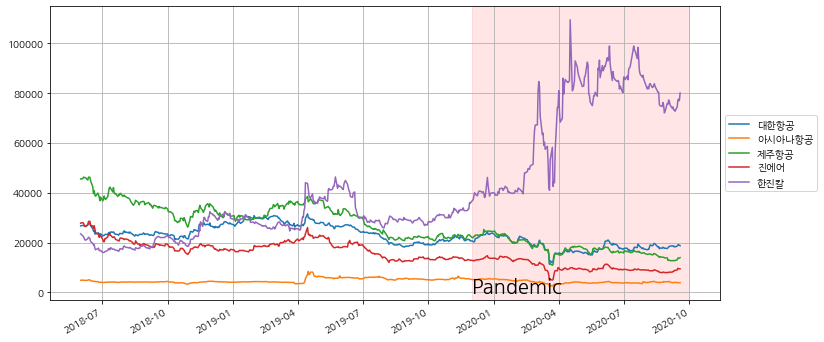

In [54]:
ax = air_sec.plot()

#팬더믹
ax.axvspan('2019-12','2020-10', alpha = 0.1, color = 'red')
ax.annotate('Pandemic', xy = ('2019-12', 70), fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**'항공 여객 운송업'의 경우, 지주사인 한진칼을 제외하면 팬더믹 이후 주가가 하락세를 보임  
하락이 가장 무난한 종목은 '아시아나 항공'임**

### 가설2]  기타 식품제조업의 경우 상승 곡선을 그리고, '항공 여객 운송업'의 경우 하락세가 이어질 것이다.

### 전체 기간 중 수익률이 높은 종목확인

In [55]:
fd_sec = fd_sec.apply(pd.to_numeric, errors='coerce')

In [56]:
fd_sec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 568 entries, 2018-06-01 to 2020-09-18
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CJ씨푸드     568 non-null    float64
 1   CJ제일제당    568 non-null    float64
 2   SPC삼립     568 non-null    float64
 3   농심        568 non-null    float64
 4   대상        568 non-null    float64
 5   동원F&B     568 non-null    float64
 6   롯데제과      568 non-null    float64
 7   삼양사       568 non-null    float64
 8   삼양식품      568 non-null    float64
 9   샘표식품      568 non-null    float64
 10  서울식품      568 non-null    float64
 11  아미코젠      568 non-null    float64
 12  에이치엘사이언스  568 non-null    float64
 13  엠에스씨      568 non-null    float64
 14  오뚜기       568 non-null    float64
 15  오리온       568 non-null    float64
 16  조흥        568 non-null    float64
 17  코스맥스엔비티   568 non-null    float64
 18  크라운제과     568 non-null    float64
 19  풀무원       568 non-null    float64
 20  한국맥널티     568

In [57]:
fd_int = fd_sec / fd_sec.iloc[0]-1.0
fd_int 

,CJ씨푸드,CJ제일제당,SPC삼립,농심,대상,동원F&B,롯데제과,삼양사,삼양식품,샘표식품,...,엠에스씨,오뚜기,오리온,조흥,코스맥스엔비티,크라운제과,풀무원,한국맥널티,해태제과식품,행남사
2018-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-04,0.049180,0.005626,0.109649,0.041854,0.003683,0.090308,0.005495,0.026713,0.013393,0.013736,...,-0.014286,-0.002334,0.074349,0.026634,-0.010526,0.003534,0.015094,0.019904,0.006734,-0.014970
2018-06-05,0.042623,0.023910,0.096491,0.035874,0.009208,0.158590,0.002747,0.034843,-0.022321,0.012363,...,-0.059740,-0.012835,0.052045,0.026634,0.004211,0.007067,-0.011321,0.000000,0.003367,0.014970
2018-06-07,0.042623,0.066104,0.219298,0.064275,0.066298,0.257709,0.010989,0.054588,-0.004464,0.065934,...,-0.053247,0.038506,0.085502,0.058111,0.010526,0.049470,0.056604,0.000000,0.013468,-0.046407
2018-06-08,0.034426,0.047820,0.219298,0.047833,0.058932,0.242291,0.013736,0.052265,-0.017857,0.042582,...,-0.046753,0.036173,0.104089,0.062954,-0.002105,0.038869,0.071698,0.000000,0.010101,-0.131737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.665574,0.102672,-0.435088,0.026906,0.014733,-0.207048,-0.428571,-0.247387,-0.004464,0.296703,...,-0.442857,-0.311552,0.026022,-0.271186,-0.547368,-0.386572,0.328302,0.160828,-0.367003,-0.470060
2020-09-15,0.649180,0.108298,-0.446491,0.032885,-0.001842,-0.220264,-0.423077,-0.260163,-0.017857,0.309066,...,-0.435714,-0.316219,0.033457,-0.273608,-0.555789,-0.372438,0.328302,0.208599,-0.373064,-0.470060
2020-09-16,0.645902,0.105485,-0.448246,0.023916,-0.005525,-0.218062,-0.431319,-0.267131,-0.017857,0.291209,...,-0.437662,-0.317386,0.040892,-0.273608,-0.562105,-0.375972,0.320755,0.178344,-0.381818,-0.470060
2020-09-17,0.596721,0.088608,-0.453509,0.007474,-0.014733,-0.226872,-0.434066,-0.284553,-0.035714,0.280220,...,-0.437662,-0.325554,0.092937,-0.273608,-0.583158,-0.378092,0.313208,0.183121,-0.390572,-0.470060


In [58]:
returns = fd_int.iloc[-1]
returns

CJ씨푸드       0.604918
CJ제일제당      0.088608
SPC삼립      -0.453509
농심         -0.002990
대상         -0.009208
동원F&B      -0.213656
롯데제과       -0.442308
삼양사        -0.293844
삼양식품       -0.031250
샘표식품        0.288462
서울식품       -0.367589
아미코젠        0.653430
에이치엘사이언스    0.467669
엠에스씨       -0.442857
오뚜기        -0.312719
오리온         0.115242
조흥         -0.268765
코스맥스엔비티    -0.579368
크라운제과      -0.385159
풀무원         0.328302
한국맥널티       0.183121
해태제과식품     -0.400000
행남사        -0.470060
Name: 2020-09-18 00:00:00, dtype: float64

In [59]:
returns.sort_values(ascending = False)

아미코젠        0.653430
CJ씨푸드       0.604918
에이치엘사이언스    0.467669
풀무원         0.328302
샘표식품        0.288462
한국맥널티       0.183121
오리온         0.115242
CJ제일제당      0.088608
농심         -0.002990
대상         -0.009208
삼양식품       -0.031250
동원F&B      -0.213656
조흥         -0.268765
삼양사        -0.293844
오뚜기        -0.312719
서울식품       -0.367589
크라운제과      -0.385159
해태제과식품     -0.400000
롯데제과       -0.442308
엠에스씨       -0.442857
SPC삼립      -0.453509
행남사        -0.470060
코스맥스엔비티    -0.579368
Name: 2020-09-18 00:00:00, dtype: float64

In [60]:
returns.mean()

-0.08450137748995769

**전체 기간 중 가장 높은 수익률을 보인 것은 아미코젠 65.3%이고, 가장 낮은 수익률을 보인것은 코스맥스엔비티  -57,9% 임**  
**아미코젠과 코스맥스엔비티의 경우, 제약용 특수효소 및 효소기반 바이오신소재를 제조하는 회사임**

## 년도별 수익률

### 기타 식품 제조업

In [61]:
df_f19 = fd_sec['2019-01-01':'2019-12-31'] #특정기간(12월 1달) 동안
acc_rets19 = df_f19/df_f19.iloc[0]-1.0
acc_rets19.iloc[-1]

CJ씨푸드       0.164147
CJ제일제당     -0.237160
SPC삼립      -0.305179
농심         -0.041833
대상         -0.056911
동원F&B      -0.189964
롯데제과       -0.022876
삼양사        -0.074954
삼양식품        0.794411
샘표식품        0.225225
서울식품       -0.005650
아미코젠       -0.249263
에이치엘사이언스    0.334146
엠에스씨       -0.369507
오뚜기        -0.226257
오리온        -0.049550
조흥         -0.167131
코스맥스엔비티    -0.577492
크라운제과      -0.078473
풀무원         0.442308
한국맥널티       0.616414
해태제과식품     -0.217012
행남사        -0.443396
Name: 2019-12-30 00:00:00, dtype: float64

In [62]:
returns19 = acc_rets19.iloc[-1]
returns19

CJ씨푸드       0.164147
CJ제일제당     -0.237160
SPC삼립      -0.305179
농심         -0.041833
대상         -0.056911
동원F&B      -0.189964
롯데제과       -0.022876
삼양사        -0.074954
삼양식품        0.794411
샘표식품        0.225225
서울식품       -0.005650
아미코젠       -0.249263
에이치엘사이언스    0.334146
엠에스씨       -0.369507
오뚜기        -0.226257
오리온        -0.049550
조흥         -0.167131
코스맥스엔비티    -0.577492
크라운제과      -0.078473
풀무원         0.442308
한국맥널티       0.616414
해태제과식품     -0.217012
행남사        -0.443396
Name: 2019-12-30 00:00:00, dtype: float64

In [64]:
returns19.sort_values(ascending = False)

삼양식품        0.794411
한국맥널티       0.616414
풀무원         0.442308
에이치엘사이언스    0.334146
샘표식품        0.225225
CJ씨푸드       0.164147
서울식품       -0.005650
롯데제과       -0.022876
농심         -0.041833
오리온        -0.049550
대상         -0.056911
삼양사        -0.074954
크라운제과      -0.078473
조흥         -0.167131
동원F&B      -0.189964
해태제과식품     -0.217012
오뚜기        -0.226257
CJ제일제당     -0.237160
아미코젠       -0.249263
SPC삼립      -0.305179
엠에스씨       -0.369507
행남사        -0.443396
코스맥스엔비티    -0.577492
Name: 2019-12-30 00:00:00, dtype: float64

In [65]:
df_f20= fd_sec['2020-01-01':'2020-09-18'] #특정기간(12월 1달) 동안
acc_rets20 = df_f20/df_f20.iloc[0]-1.0
acc_rets20.iloc[-1]

CJ씨푸드       0.789762
CJ제일제당      0.579592
SPC삼립      -0.277262
농심          0.407173
대상          0.174672
동원F&B      -0.201342
롯데제과       -0.321070
삼양사         0.216000
삼양식품        0.217733
샘표식품        0.322990
서울식품       -0.080460
아미코젠        0.817460
에이치엘사이언스   -0.096296
엠에스씨       -0.087234
오뚜기         0.072860
오리온         0.421801
조흥          0.010033
코스맥스엔비티     0.529862
크라운제과       0.006944
풀무원         0.523810
한국맥널티      -0.182618
해태제과식품      0.234072
행남사         0.000000
Name: 2020-09-18 00:00:00, dtype: float64

In [68]:
return20 = acc_rets20.iloc[-1]

In [71]:
return20.sort_values(ascending = False)

아미코젠        0.817460
CJ씨푸드       0.789762
CJ제일제당      0.579592
코스맥스엔비티     0.529862
풀무원         0.523810
오리온         0.421801
농심          0.407173
샘표식품        0.322990
해태제과식품      0.234072
삼양식품        0.217733
삼양사         0.216000
대상          0.174672
오뚜기         0.072860
조흥          0.010033
크라운제과       0.006944
행남사         0.000000
서울식품       -0.080460
엠에스씨       -0.087234
에이치엘사이언스   -0.096296
한국맥널티      -0.182618
동원F&B      -0.201342
SPC삼립      -0.277262
롯데제과       -0.321070
Name: 2020-09-18 00:00:00, dtype: float64

In [72]:
df_f18 = fd_sec['2018-06-01':'2018-12-31'] #특정기간(12월 1달) 동안
acc_rets18 = df_f18/df_f18.iloc[0]-1.0
acc_rets18.iloc[-1]

CJ씨푸드      -0.239344
CJ제일제당     -0.070323
SPC삼립       0.118421
농심         -0.239163
대상         -0.077348
동원F&B       0.266520
롯데제과       -0.170330
삼양사        -0.361208
삼양식품       -0.535714
샘표식품       -0.234890
서울식품       -0.300395
아미코젠        0.231047
에이치엘사이언스    0.296241
엠에스씨       -0.025974
오뚜기        -0.155193
오리온        -0.107807
조흥         -0.116223
코스맥스엔비티    -0.309474
크라운제과      -0.342756
풀무원        -0.399245
한국맥널티      -0.111465
해태제과식품     -0.373737
행남사        -0.026946
Name: 2018-12-28 00:00:00, dtype: float64

In [73]:
returns18 = acc_rets18.iloc[-1]
returns18

CJ씨푸드      -0.239344
CJ제일제당     -0.070323
SPC삼립       0.118421
농심         -0.239163
대상         -0.077348
동원F&B       0.266520
롯데제과       -0.170330
삼양사        -0.361208
삼양식품       -0.535714
샘표식품       -0.234890
서울식품       -0.300395
아미코젠        0.231047
에이치엘사이언스    0.296241
엠에스씨       -0.025974
오뚜기        -0.155193
오리온        -0.107807
조흥         -0.116223
코스맥스엔비티    -0.309474
크라운제과      -0.342756
풀무원        -0.399245
한국맥널티      -0.111465
해태제과식품     -0.373737
행남사        -0.026946
Name: 2018-12-28 00:00:00, dtype: float64

In [74]:
returns18.sort_values(ascending = False)

에이치엘사이언스    0.296241
동원F&B       0.266520
아미코젠        0.231047
SPC삼립       0.118421
엠에스씨       -0.025974
행남사        -0.026946
CJ제일제당     -0.070323
대상         -0.077348
오리온        -0.107807
한국맥널티      -0.111465
조흥         -0.116223
오뚜기        -0.155193
롯데제과       -0.170330
샘표식품       -0.234890
농심         -0.239163
CJ씨푸드      -0.239344
서울식품       -0.300395
코스맥스엔비티    -0.309474
크라운제과      -0.342756
삼양사        -0.361208
해태제과식품     -0.373737
풀무원        -0.399245
삼양식품       -0.535714
Name: 2018-12-28 00:00:00, dtype: float64

In [148]:
df_m = fd_sec['2020-08-01':'2020-08-31'] #특정기간(12월 1달) 동안
acc_rets = df_m/df_m.iloc[0]-1.0
acc_rets.iloc[-1]

CJ씨푸드       0.596752
CJ제일제당     -0.016908
SPC삼립      -0.043411
농심         -0.057667
대상          0.126706
동원F&B      -0.022099
롯데제과       -0.103139
삼양사         0.084553
삼양식품       -0.116183
샘표식품       -0.020725
서울식품        0.126582
아미코젠        0.022277
에이치엘사이언스   -0.173111
엠에스씨        0.071770
오뚜기         0.059859
오리온         0.040741
조흥         -0.035032
코스맥스엔비티     0.212121
크라운제과      -0.018605
풀무원        -0.013158
한국맥널티       0.082321
해태제과식품      0.150784
행남사         0.000000
Name: 2020-08-31 00:00:00, dtype: float64

In [149]:
from datetime import datetime, timedelta

the_day = datetime(2020,8,31)

for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    print(start, '~',end)

2020-08-26 00:00:00 ~ 2020-08-31 00:00:00
2020-08-21 00:00:00 ~ 2020-08-31 00:00:00
2020-08-11 00:00:00 ~ 2020-08-31 00:00:00
2020-07-02 00:00:00 ~ 2020-08-31 00:00:00
2020-05-03 00:00:00 ~ 2020-08-31 00:00:00
2020-01-04 00:00:00 ~ 2020-08-31 00:00:00


In [150]:
from datetime import datetime, timedelta

the_day = datetime(2020,8,31)
row_dict ={}
for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    
    df_m = fd_sec[start:end] #특정기간
    acc_rets = df_m/df_m.iloc[0]-1.0
    row_dict[days] = acc_rets.iloc[-1]

In [152]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
CJ씨푸드,0.413174,0.458591,0.518662,0.536458,0.439024,1.209738
CJ제일제당,-0.022809,0.025189,-0.082300,0.141655,0.501845,0.743041
SPC삼립,0.011475,0.018152,-0.028346,0.004886,-0.128531,-0.274118
농심,0.001393,-0.004155,-0.038770,-0.020436,0.218644,0.556277
대상,0.026643,0.078358,0.090566,0.096774,0.344186,0.307692
동원F&B,-0.008403,0.014327,-0.043243,-0.035422,-0.112782,-0.188073
롯데제과,-0.014778,-0.019608,-0.074074,-0.047619,-0.193548,-0.328859
삼양사,-0.047143,0.001502,-0.030523,0.634804,0.743791,0.352941
삼양식품,-0.031818,-0.040541,-0.134146,-0.151394,0.000000,0.152597
샘표식품,-0.004215,-0.007353,-0.091346,0.040749,0.536585,0.377551


In [153]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5      0.036199
10     0.063882
20     0.017442
60     0.111822
120    0.251637
240    0.260076
dtype: float64

In [151]:
# 표로 표시하기

In [154]:
def color_negative_red(val):
    color='red' if val <0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['backgound-color:yellow' if v else '' for v in is_max]

df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,5,10,20,60,120,240
CJ씨푸드,0.413174,0.458591,0.518662,0.536458,0.439024,1.209738
CJ제일제당,-0.022809,0.025189,-0.082300,0.141655,0.501845,0.743041
SPC삼립,0.011475,0.018152,-0.028346,0.004886,-0.128531,-0.274118
농심,0.001393,-0.004155,-0.038770,-0.020436,0.218644,0.556277
대상,0.026643,0.078358,0.090566,0.096774,0.344186,0.307692
동원F&B,-0.008403,0.014327,-0.043243,-0.035422,-0.112782,-0.188073
롯데제과,-0.014778,-0.019608,-0.074074,-0.047619,-0.193548,-0.328859
삼양사,-0.047143,0.001502,-0.030523,0.634804,0.743791,0.352941
삼양식품,-0.031818,-0.040541,-0.134146,-0.151394,0.000000,0.152597
샘표식품,-0.004215,-0.007353,-0.091346,0.040749,0.536585,0.377551


### 항공 여객운수업

In [77]:
df_a = air_sec['2020-08-01':'2020-08-31'] #특정기간(12월 1달) 동안
acc_rets0 = df_a/df_a.iloc[0]-1.0
acc_rets0.iloc[-1]

대한항공      0.029155
아시아나항공    0.086902
제주항공     -0.091503
진에어      -0.106054
한진칼      -0.070991
Name: 2020-08-31 00:00:00, dtype: object

In [78]:
from datetime import datetime, timedelta

the_day = datetime(2020,8,31)

for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    print(start, '~',end)

2020-08-26 00:00:00 ~ 2020-08-31 00:00:00
2020-08-21 00:00:00 ~ 2020-08-31 00:00:00
2020-08-11 00:00:00 ~ 2020-08-31 00:00:00
2020-07-02 00:00:00 ~ 2020-08-31 00:00:00
2020-05-03 00:00:00 ~ 2020-08-31 00:00:00
2020-01-04 00:00:00 ~ 2020-08-31 00:00:00


In [80]:
from datetime import datetime, timedelta

the_day = datetime(2020,8,31)
row_dict ={}
for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    
    df_a = air_sec[start:end] #특정기간
    acc_rets0 = df_a/df_a.iloc[0]-1.0
    row_dict[days] = acc_rets0.iloc[-1]

In [81]:
df_rets0 = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
대한항공,-0.019444,-0.013966,-0.066138,-0.005634,0.105059,-0.20352
아시아나항공,-0.020431,0.053724,-0.033595,0.129581,0.081454,-0.199443
제주항공,-0.017668,-0.034722,-0.082508,-0.179941,-0.232044,-0.398659
진에어,-0.019649,-0.006677,-0.078362,-0.132974,-0.145426,-0.396605
한진칼,0.012,0.012,-0.08,-0.122543,-0.082225,0.943662


In [82]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5     -0.013038
10     0.002072
20    -0.068120
60    -0.062302
120   -0.054636
240   -0.050913
dtype: float64

In [83]:
def color_negative_red(val):
    color='red' if val <0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['backgound-color:yellow' if v else '' for v in is_max]

df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,5,10,20,60,120,240
대한항공,-0.019444,-0.013966,-0.066138,-0.005634,0.105059,-0.203520
아시아나항공,-0.020431,0.053724,-0.033595,0.129581,0.081454,-0.199443
제주항공,-0.017668,-0.034722,-0.082508,-0.179941,-0.232044,-0.398659
진에어,-0.019649,-0.006677,-0.078362,-0.132974,-0.145426,-0.396605
한진칼,0.012000,0.012000,-0.080000,-0.122543,-0.082225,0.943662


### 이동평균선으로 나타내기

In [89]:
OZ = air_sec['아시아나항공'].to_frame()
OZ

,아시아나항공
2018-06-01,4910.0
2018-06-04,4965.0
2018-06-05,4915.0
2018-06-07,4875.0
2018-06-08,4865.0
...,...
2020-09-14,3965.0
2020-09-15,3995.0
2020-09-16,3955.0
2020-09-17,3905.0


In [110]:
ma5 = OZ['아시아나항공'].rolling(5).mean()
ma10 = OZ['아시아나항공'].rolling(10).mean()
ma20 = OZ['아시아나항공'].rolling(20).mean()
ma60 = OZ['아시아나항공'].rolling(60).mean()
ma120 = OZ['아시아나항공'].rolling(120).mean()
ma240 = OZ['아시아나항공'].rolling(240).mean()

In [112]:
# 기존 DataFrame에 column 추가
OZ['ma5'] = ma5
OZ['ma10'] = ma10
OZ['ma20'] = ma20
OZ['ma60'] = ma60
OZ['ma120'] = ma120
OZ['ma240'] = ma240

In [114]:
OZ

,아시아나항공,MA5,MA10,MA20,MA60,MA120,MA240,ma5,ma10,ma20,ma60,ma120,ma240
2018-06-01,4910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-04,4965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05,4915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,4875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,4865.0,4906.0,NaN,NaN,NaN,NaN,NaN,4906.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,3965.0,4013.0,4139.0,4152.25,4030.500000,3948.583333,4471.083333,4013.0,4139.0,4152.25,4030.500000,3948.583333,4471.083333
2020-09-15,3995.0,4028.0,4108.5,4151.25,4032.000000,3958.416667,4466.145833,4028.0,4108.5,4151.25,4032.000000,3958.416667,4466.145833
2020-09-16,3955.0,4022.0,4057.5,4145.25,4031.416667,3965.041667,4461.208333,4022.0,4057.5,4145.25,4031.416667,3965.041667,4461.208333
2020-09-17,3905.0,3977.0,4008.0,4143.00,4031.000000,3969.666667,4456.229167,3977.0,4008.0,4143.00,4031.000000,3969.666667,4456.229167


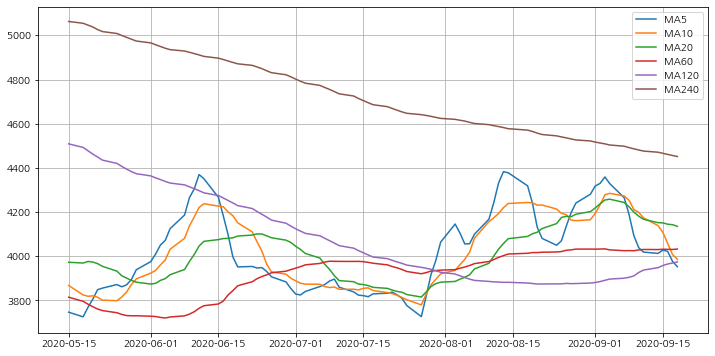

In [116]:
period = 90
plt.plot(OZ.index[-period:], OZ['ma5'][-period:], label='MA5')
plt.plot(OZ.index[-period:], OZ['ma10'][-period:], label='MA10')
plt.plot(OZ.index[-period:], OZ['ma20'][-period:], label='MA20')
plt.plot(OZ.index[-period:], OZ['ma60'][-period:], label='MA60')
plt.plot(OZ.index[-period:], OZ['ma120'][-period:], label='MA120')
plt.plot(OZ.index[-period:], OZ['ma240'][-period:], label='MA240')
plt.legend()
plt.grid(True)
plt.show()

**팬더믹의 여파로
기관 투자자들은 2020년에 들어서면서 팬더믹 여파로 인해 매도를 계속 하는 경향이 있음.  
장기 투자 관점에서는 팬더믹 여파에 대한 뉴스들에 따라 투자에 대한 여부가 달라질 것**